In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/andy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/andy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Wrangling

#### Read and Wrangle Dataset 1

In [8]:
df = pd.read_csv('data/SPAM_SMS.csv')
print(df.head()) 

   Unnamed: 0 masked_celphone_number                hashed_celphone_number  \
0           0          +63960****373  91caa5d6-1f97-3a2d-982b-5b0c021632ab   
1           1          +63981****852  f66589b7-4e6a-33ba-b7c5-d0dacb48552b   
2           2          +63946****113  1f332ce5-618e-32e6-b2ab-8e567917aeef   
3           3          +63950****934  5e6fcdc3-b2b8-3f71-b411-cacb8d40a0b9   
4           4          +63960****401  aafa248f-04ef-3005-a672-db79286919ee   

                      date                                               text  \
0  2022-11-12 14:02:10.079  Welcome ! your have P1222 for S!ot , \nWeb: 11...   
1  2022-11-12 14:33:48.916  My god, at least 999P rewards waiting for you\...   
2  2022-11-13 23:03:15.023  DEAR VIP <REAL NAME>, No. 1 Online Sabong Site...   
3  2022-11-14 00:07:18.715  <REAL NAME>! Today, you can win the iphone14PR...   
4  2022-11-15 02:28:56.636  Welcome ! your have P1222 for S!ot , \nWeb: gr...   

  carrier  
0   Smart  
1   Smart  
2     TN

In [9]:

df.drop(columns=['Unnamed: 0','masked_celphone_number','hashed_celphone_number', 'date', 'carrier'], inplace=True)
df['spam_tag'] = True
print(df.head())
print(df.describe())

                                                text  spam_tag
0  Welcome ! your have P1222 for S!ot , \nWeb: 11...      True
1  My god, at least 999P rewards waiting for you\...      True
2  DEAR VIP <REAL NAME>, No. 1 Online Sabong Site...      True
3  <REAL NAME>! Today, you can win the iphone14PR...      True
4  Welcome ! your have P1222 for S!ot , \nWeb: gr...      True
                              text spam_tag
count                          619      619
unique                         564        1
top     <<Content not supported.>>     True
freq                            13      619


#### Read and Wrangle Dataset 2

In [10]:
df2 = pd.read_csv('data/spam.csv',encoding='latin1')
print(df2.head()) 

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [11]:
def boolize(row):
    return False if row['v1'] == 'ham' else True


In [12]:
df2['spam_tag'] = df2.apply(boolize, axis=1)
df2.rename(columns={'v2':'text'}, inplace=True)
df2.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4', 'v1'], inplace=True)
print(df2.head()) 
print(df2.describe())

                                                text  spam_tag
0  Go until jurong point, crazy.. Available only ...     False
1                      Ok lar... Joking wif u oni...     False
2  Free entry in 2 a wkly comp to win FA Cup fina...      True
3  U dun say so early hor... U c already then say...     False
4  Nah I don't think he goes to usf, he lives aro...     False
                          text spam_tag
count                     5572     5572
unique                    5169        2
top     Sorry, I'll call later    False
freq                        30     4825


#### Read and Wrangle Dataset3

In [13]:
df3 = pd.read_csv('data/text-messages.csv')
print(df3.head()) 
print(df3['category'].unique()) 

         date-received            date-read         sender category  \
0  2024-02-05 18:11:17  2024-02-05 18:11:24  +6390998***20     spam   
1  2023-03-28 16:28:37  2023-03-28 16:28:48          GCash      ads   
2  2023-03-29 16:45:31  2023-03-29 16:45:38          GCash   notifs   
3  2023-03-29 17:17:32  2023-03-29 17:17:43          GCash   notifs   
4  2023-03-30 10:16:02  2023-03-30 10:16:03          GCash      OTP   

                                                text  
0  Make money while watching YouTube, earn 500P p...  
1  Get up to P125K extra funds for emergencies wi...  
2                                         <REDACTED>  
3                                         <REDACTED>  
4                                         <REDACTED>  
['spam' 'ads' 'notifs' 'OTP' 'gov']


In [14]:
def is_spam(x):
    return True if x['category'] == 'spam' else False

In [15]:
df3['spam_tag'] = df3.apply(is_spam, axis=1)
df3 = df3[['text', 'spam_tag']]
df3 = df3.drop(df3[df3['text']=='<REDACTED>'].index)
print(df3.head())
print(df3.describe())

                                                 text  spam_tag
0   Make money while watching YouTube, earn 500P p...      True
1   Get up to P125K extra funds for emergencies wi...     False
9   G to upgrade your home! Just use GCredit to pa...     False
10  Good news! You can still pay with GGives at yo...     False
11  Get up to P125K extra funds for emergencies wi...     False
                                                     text spam_tag
count                                                 898      898
unique                                                750        2
top     Pwede ng ma-access ang iba't ibang government ...     True
freq                                                   23      473


#### Combine All 3 Datasets and Apply Preprocessing

In [16]:
dataset = pd.concat([df,df2,df3])
# print(dataset['spam_tag'].head())
print(dataset.size)

14178


In [17]:
def preprocess_text(text):
    words = word_tokenize(text) #Tokenization
    words = [word.lower() for word in words if word.isalnum()] #to Lowercase
    words = [word for word in words if word not in stopwords.words("english")] #Remove Stopwords
    return " ".join(words) #Concate tokens

In [18]:
dataset['text'] = dataset['text'].apply(preprocess_text)
dataset = dataset.sample(frac=1) # shuffle the dataset
print(dataset.head())
print(dataset.describe())


                                                   text  spam_tag
850   u reach orchard already u wan 2 go buy tickets...     False
207   landbank alert due simcard registration act pl...      True
2092  oh love soooo good hear omg missed much today ...     False
2638                                  gobi arts college     False
38    free bonus jackpot prize 1 peso play win good ...      True
                    text spam_tag
count               7089     7089
unique              6143        2
top     sorry call later    False
freq                  30     5250


### One-Hot the Dataset

In [19]:
def tokenize(row):
    # print(f'{row["text"]}\n\n')
    lst = row['text'].split()
    ones = [True for item in lst]
    zipped = dict(zip(lst,ones))
    # print(zipped)
    return zipped

In [20]:
one_hot = dataset.apply(tokenize, axis=1, result_type='expand')
print(one_hot.head())
dataset_oh = pd.concat([dataset, one_hot], axis=1)

         u reach orchard already   wan     2    go   buy tickets first  ...  \
850   True  True    True    True  True  True  True  True    True  True  ...   
207    NaN   NaN     NaN     NaN   NaN   NaN   NaN   NaN     NaN   NaN  ...   
2092   NaN   NaN     NaN     NaN   NaN   NaN   NaN   NaN     NaN   NaN  ...   
2638   NaN   NaN     NaN     NaN   NaN   NaN   NaN   NaN     NaN   NaN  ...   
38     NaN   NaN     NaN     NaN   NaN   NaN   NaN   NaN     NaN   NaN  ...   

     matthew 09063440451 ppm150 box334 practising curtsey watever built  \
850      NaN         NaN    NaN    NaN        NaN     NaN     NaN   NaN   
207      NaN         NaN    NaN    NaN        NaN     NaN     NaN   NaN   
2092     NaN         NaN    NaN    NaN        NaN     NaN     NaN   NaN   
2638     NaN         NaN    NaN    NaN        NaN     NaN     NaN   NaN   
38       NaN         NaN    NaN    NaN        NaN     NaN     NaN   NaN   

     lonlines lotz  
850       NaN  NaN  
207       NaN  NaN  
2092      N

In [21]:
dataset_oh.fillna(False, inplace=True)
print(dataset_oh.head())

                                                   text  spam_tag      u  \
850   u reach orchard already u wan 2 go buy tickets...     False   True   
207   landbank alert due simcard registration act pl...      True  False   
2092  oh love soooo good hear omg missed much today ...     False  False   
2638                                  gobi arts college     False  False   
38    free bonus jackpot prize 1 peso play win good ...      True  False   

      reach  orchard  already    wan      2     go    buy  ...  matthew  \
850    True     True     True   True   True   True   True  ...    False   
207   False    False    False  False  False  False  False  ...    False   
2092  False    False    False  False  False  False  False  ...    False   
2638  False    False    False  False  False  False  False  ...    False   
38    False    False    False  False  False  False  False  ...    False   

      09063440451  ppm150  box334  practising  curtsey  watever  built  \
850         False 

In [19]:
# print(len(dataset_oh.columns))
# print(len(set(dataset_oh.columns)))
# print(dataset_oh)

#### Extract the Features X and Target Y

In [22]:
features = [x for x in dataset_oh.columns if x not in ['spam_tag','text']]
print(f'features length={len(features)}')

features length=9920


In [23]:
Y = dataset_oh['spam_tag']
X = dataset_oh[features]
print(X.head())
print(Y.head())

          u  reach  orchard  already    wan      2     go    buy  tickets  \
850    True   True     True     True   True   True   True   True     True   
207   False  False    False    False  False  False  False  False    False   
2092  False  False    False    False  False  False  False  False    False   
2638  False  False    False    False  False  False  False  False    False   
38    False  False    False    False  False  False  False  False    False   

      first  ...  matthew  09063440451  ppm150  box334  practising  curtsey  \
850    True  ...    False        False   False   False       False    False   
207   False  ...    False        False   False   False       False    False   
2092  False  ...    False        False   False   False       False    False   
2638  False  ...    False        False   False   False       False    False   
38    False  ...    False        False   False   False       False    False   

      watever  built  lonlines   lotz  
850     False  False  

#### Split into Training, Validation and Test Sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.9, random_state = RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.8, random_state = RANDOM_STATE)

In [25]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'test samples: {len(X_test)}')

train samples: 5104
validation samples: 1276
test samples: 709


### Hyperparameters for Tuning

In [36]:
min_samples_split_list = [50, 100, 200, 500, 1000, 2000, 4000, 8000] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
n_estimators_list = [10,50,100,500,1000]

# Decision Tree

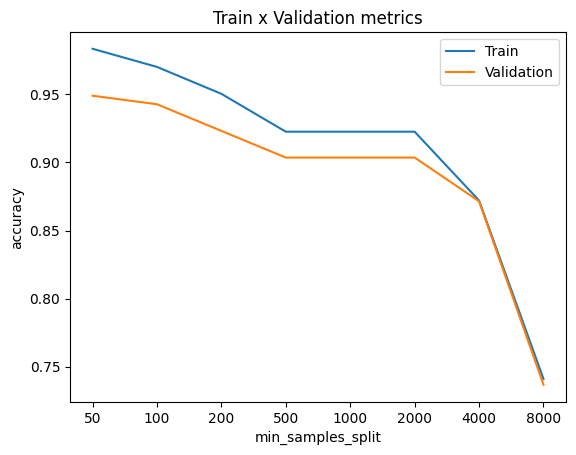

In [37]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

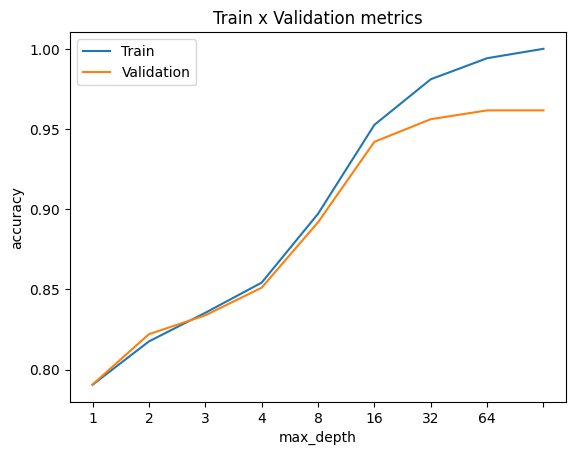

In [38]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

#### Final Model, using min sample split = 50 and max depth = 32

In [39]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 32,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [40]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9702
Metrics validation:
	Accuracy score: 0.9591


# Random Forest

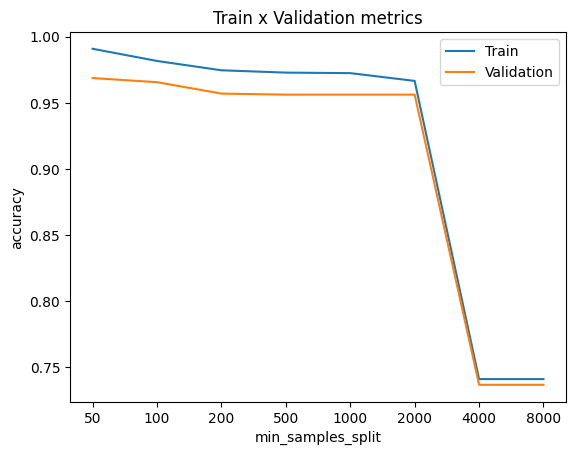

In [41]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train.values.ravel()) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

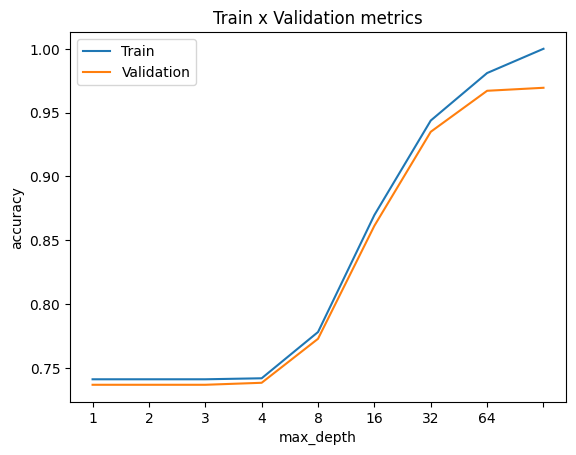

In [53]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train.values.ravel()) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

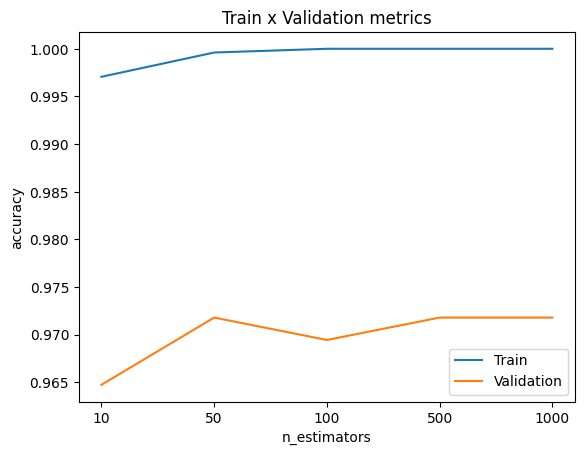

In [54]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train.values.ravel()) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

#### Final Model, using N-estimators = 50, max depth = 64, min samples split=50

In [26]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 64, 
                                             min_samples_split = 50).fit(X_train,y_train.values.ravel()) 

In [33]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9764
Metrics test:
	Accuracy score: 0.9659


# Manually entered Spam Messages

In [57]:
def is_spam(text):
    processed = preprocess_text(text).split()
    arr = np.zeros(len(features), dtype = bool)
    for i,text in enumerate(features):
        if text in processed:
            arr[i] = True
    data = dict(zip(features,arr))
    # print(data)
    df_new = pd.DataFrame(data, index=[0])
    # print(df_new)
    return random_forest_model.predict(df_new)[0]

In [69]:
# text = "get a chance to win 100! join now!"
# text = "click here to win prizes"
# text = "here na me, where na u?"
# text = "the quick brown fox jumps over the lazy dog into the river"
text = "Receive 100P once use your number to register on:Filbet.com. No deposit,you may withdraw once the turnover reaches 1x. No Messages? Send STOP 10559 to 225687."
# text = "Congrats! You've won a $500 gift card. Click the link to claim your prize now:"
# text = "Hi, I saw your profile online. I would love to chat! Let's connect here: http://bit.ly/asfasdf"
# text = "Breaking: Prices are dropping! Save up to 70% only today. Shop now: http://bit.ly/asfasdf1"
# text = "You are the lucky winner of our monthly raffle! Claim your $1,000 cash prize now:http://bit.ly/asfasdf2"

print(is_spam(text))

True


# Check vs Actual Spam Messages In Our Phones

In [36]:
df_lt5 = pd.read_csv('./data/lt5_messages.csv', encoding='Latin')
# print(df_lt5.head())
sms = df_lt5['text'].to_list()
# print(sms)
processed = [preprocess_text(x) for x in sms]
# print(processed)
values = []
for item in processed:
    arr = np.zeros(len(features), dtype = bool)
    for i,text in enumerate(features):
        if text in item.split():
            arr[i] = True
    values.append(np.copy(arr))
df_lt5_oh = pd.DataFrame.from_records(values, columns = features)
df_lt5_oh['spam_flag'] = df_lt5['spam_flag']
# print(df_lt5_oh.head())
lt5_predictions = random_forest_model.predict(df_lt5_oh[features])
y_lt5 = pd.DataFrame(df_lt5_oh['spam_flag'])
print(f"Metrics LT5 Messages:\n\tAccuracy score: {accuracy_score(lt5_predictions, y_lt5):.4f}")

Metrics LT5 Messages:
	Accuracy score: 0.6500


# Check vs ChatGPT Generated Spam Mesasges

In [38]:
# df_gpt  = pd.read_csv('chatgpt_generated_spam.txt', names=['text'])
# print(df_gpt.head())
sms = []
with open('./data/chatgpt_generated_spam.txt') as f:
    line = 'sms'
    while line:
        line = f.readline()
        sms.append(line)
processed = [preprocess_text(x) for x in sms]
# print(processed)
values = []
for item in processed:
    arr = np.zeros(len(features), dtype = bool)
    for i,text in enumerate(features):
        if text in item.split():
            arr[i] = True
    values.append(np.copy(arr))
df_gpt = pd.DataFrame.from_records(values, columns = features)
df_gpt['spam'] = True
# print(df_gpt)
gpt_predictions = random_forest_model.predict(df_gpt[features])
y_gpt = pd.DataFrame(df_gpt['spam'])
# print(y_gpt)
# print(gpt_predictions)
print(f"Metrics GPT:\n\tAccuracy score: {accuracy_score(gpt_predictions, y_gpt):.4f}")

Metrics GPT:
	Accuracy score: 0.2000
